## Final Project Submission

Please fill out:
* Student name: Alex Miningwa
* Student pace: part time
* Scheduled project review date/time: August 30th

## Predicting Customer Churn: Enhancing Retention Strategies Through Data-Driven Insights

### Business Understanding

**Project Objective**:The primary objective of this project is to help the business reduce customer churn by identifying key factors that contribute to customers leaving the service. By analyzing customer data, we aim to provide actionable insights and recommendations that will enhance customer retention strategies, thereby fostering a more stable and loyal customer base.

**Business Problem**: The business is facing challenges with customer retention, leading to increased costs and lost revenue. Understanding the reasons behind customer churn is crucial for developing strategies that improve customer satisfaction and loyalty.

**Stakeholders:**
* **Customer Retention Team:** Focused on understanding churn patterns to develop effective retention strategies.
* **Executives:** Interested in maintaining overall business performance and revenue stability.
* **Customer Service Managers:** Aim to maintain high levels of customer satisfaction and address issues that may lead to churn.

In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay

In [3]:
warnings.filterwarnings('ignore')

### Data Understanding
**Dataset Source:** The dataset used in this project is sourced from kaggle and provides comprehensive customer information. This dataset includes a variety of attributes related to customer demographics, service usage patterns, and customer support interactions, alongside indicators of customer churn.

**Dataset Description:**

* Demographic Information: Includes details such as the state of residence, account length, and area code.
* Service Usage Information: Covers features like total day minutes, total evening minutes, total night minutes, and total international minutes, along with the corresponding charges and the number of calls made during these periods.
* Service Plans and Features: Encompasses whether the customer has an international plan, a voicemail plan, and the number of voicemail messages.
* Customer Support Interactions: Captures the number of customer service calls made by the customer.
* Churn Indicator: The target variable indicates whether a customer has churned (left the service) or not.

**Usage:** This dataset is utilized to explore patterns and correlations between various factors and customer churn. By analyzing these attributes, we can identify significant predictors of customer churn and develop a predictive model to forecast which customers are at risk of leaving the service.

**Data Preparation:** Some preliminary data cleaning has been performed on the dataset to ensure its quality. The remaining tasks involve:
* Encoding Categorical Variables: Converting categorical variables, such as the presence of an international plan, into a numerical format to be used in machine learning models.
* Addressing Class Imbalance: Applying techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the target variable, ensuring the model performs well on both majority and minority classes.

### Loading Dataset

In [4]:
df = pd.read_csv('customer_churn.csv')

df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

The dataset is loaded into a DataFrame using pandas. The notebook displays the first few rows of the dataset, providing an overview of the columns and data types. This step helps in understanding the structure of the data

### Dataset Description
The dataset contains information on customers, focusing on factors that might influence their decision to churn. Here are the columns and their descriptions:

State:
The U.S. state in which the customer resides.
Example Values: OH, NJ

Account Length:
The number of days the customer has been with the service.
Example Values: 128, 107

Area Code:
The area code corresponding to the customer's phone number.
Example Values: 415, 408

International Plan:
Indicates whether the customer has subscribed to an international calling plan.
Example Values: Yes, No

Voice Mail Plan:
Indicates whether the customer has a voice mail service.
Example Values: Yes, No

Number Vmail Messages:
The number of voice mail messages the customer has.
Example Values: 25, 0

Total Day Minutes:
The total minutes of calls made by the customer during the day.
Example Values: 265.1, 161.6

Total Day Calls:
The total number of calls made by the customer during the day.
Example Values: 110, 123

Total Day Charge:
The total charge for day calls.
Example Values: 45.07, 27.47

Total Eve Minutes:
The total minutes of calls made by the customer during the evening.
Example Values: 197.4, 195.5

Total Eve Calls:
The total number of calls made by the customer during the evening.
Example Values: 99, 103

Total Eve Charge:
The total charge for evening calls.
Example Values: 16.78, 16.62

Total Night Minutes:
The total minutes of calls made by the customer during the night.
Example Values: 244.7, 254.4

Total Night Calls:
The total number of calls made by the customer during the night.
Example Values: 91, 103

Total Night Charge:
The total charge for night calls.
Example Values: 11.01, 11.45

Total Intl Minutes:
The total minutes of international calls made by the customer.
Example Values: 10.0, 13.7

Total Intl Calls:
The total number of international calls made by the customer.
Example Values: 3, 3

Total Intl Charge:
The total charge for international calls.
Example Values: 2.70, 3.70

Customer Service Calls:
The number of calls the customer has made to customer service.
Example Values: 1, 3

Churn:
The target variable indicating whether the customer has churned (left the service).
Example Values: Yes, No

In [5]:
df.shape

(3333, 21)

The dataset contains 3333 rows and 21 columns

In [6]:
# Checking basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the output above we get that:
* Total entries: 3333
* Total columns: 21
* Non-null entries for each column: 3333
* Data types: A mix of integers and objects (categorical data)
* Memory usage: Approximately 546.9+ KB

In [7]:
# Descritive analysis
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

From the output above we get that:

* Count: All numerical columns have 3333 non-null entries, indicating no missing values in these columns.
* Mean: Provides the average value for each numerical column. For example, the average Account Length is approximately 101.0648 days.
* Standard Deviation (std): Indicates the amount of variation or dispersion from the mean. For instance, the Total Day Minutes has a standard deviation of 54.4674 minutes.
* Min: Shows the minimum value for each numerical column. For instance, the minimum Total Day Minutes is 0.0 minutes.
* 25%, 50%, 75% (Quartiles): These represent the values below which 25%, 50%, and 75% of the data fall. For example, 25% of customers have Customer Service Calls equal to or less than 1.
* Max: Indicates the maximum value for each numerical column. For instance, the maximum Total Day Minutes is 350.8 minutes.

### Data Cleaning

In [8]:
#Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in the dataset

In [9]:
# Checking for duplicates
duplicates_with_rows = df[df.duplicated()]
duplicates_with_rows

Empty DataFrame
Columns: [state, account length, area code, phone number, international plan, voice mail plan, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl calls, total intl charge, customer service calls, churn]
Index: []

[0 rows x 21 columns]

No duplicates hence no further cleaning

In [10]:
# Dropping phone number column
df = df.drop('phone number', axis=1)

Dropping unnecessary columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### EDA

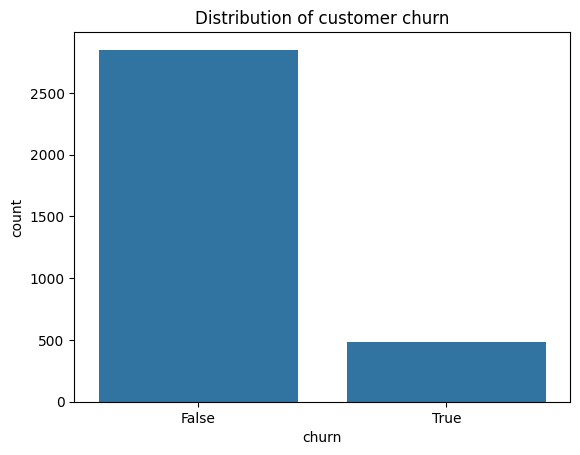

In [12]:
# Visualizing the distribution of the target variable (Churn)
sns.countplot(data=df, x='churn')
plt.title('Distribution of customer churn')
plt.show()

The countplot visualizes the distribution of the target variable "Churn" in the SyriaTel Customer Churn dataset. The plot shows the number of customers who churned (denoted by 'True') and those who did not churn (denoted by 'False'). From the graph, it's evident that the dataset contains more instances of customers who did not churn compared to those who churned. This indicates an imbalance in the dataset.

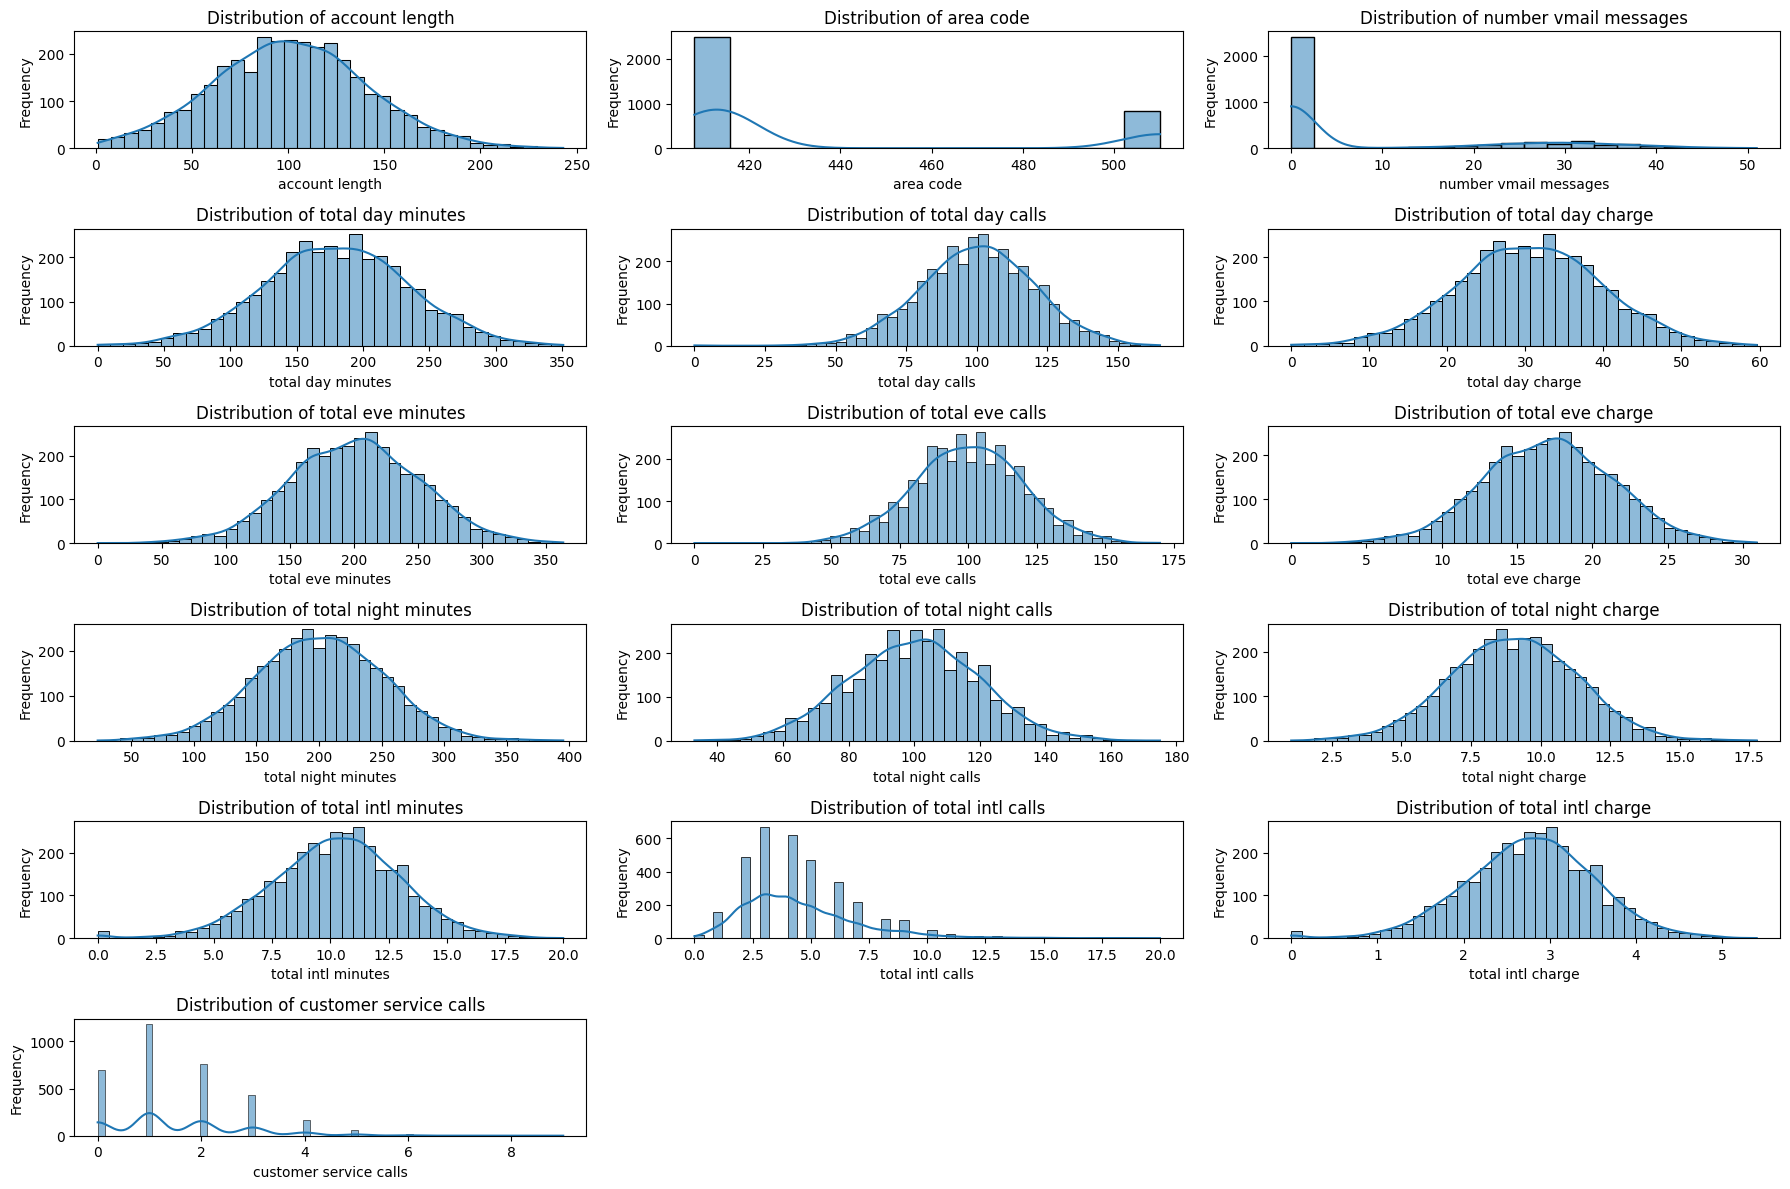

In [13]:
# Determining the number of rows and columns for subplots
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numeric_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Visualizing the distribution of numerical features
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Each histogram provides insights into the distribution of a particular numerical feature, showing the frequency of values along the x-axis and the corresponding frequency density along the y-axis. This visualization helps in understanding the range, central tendency, and spread of each numerical feature in the dataset.

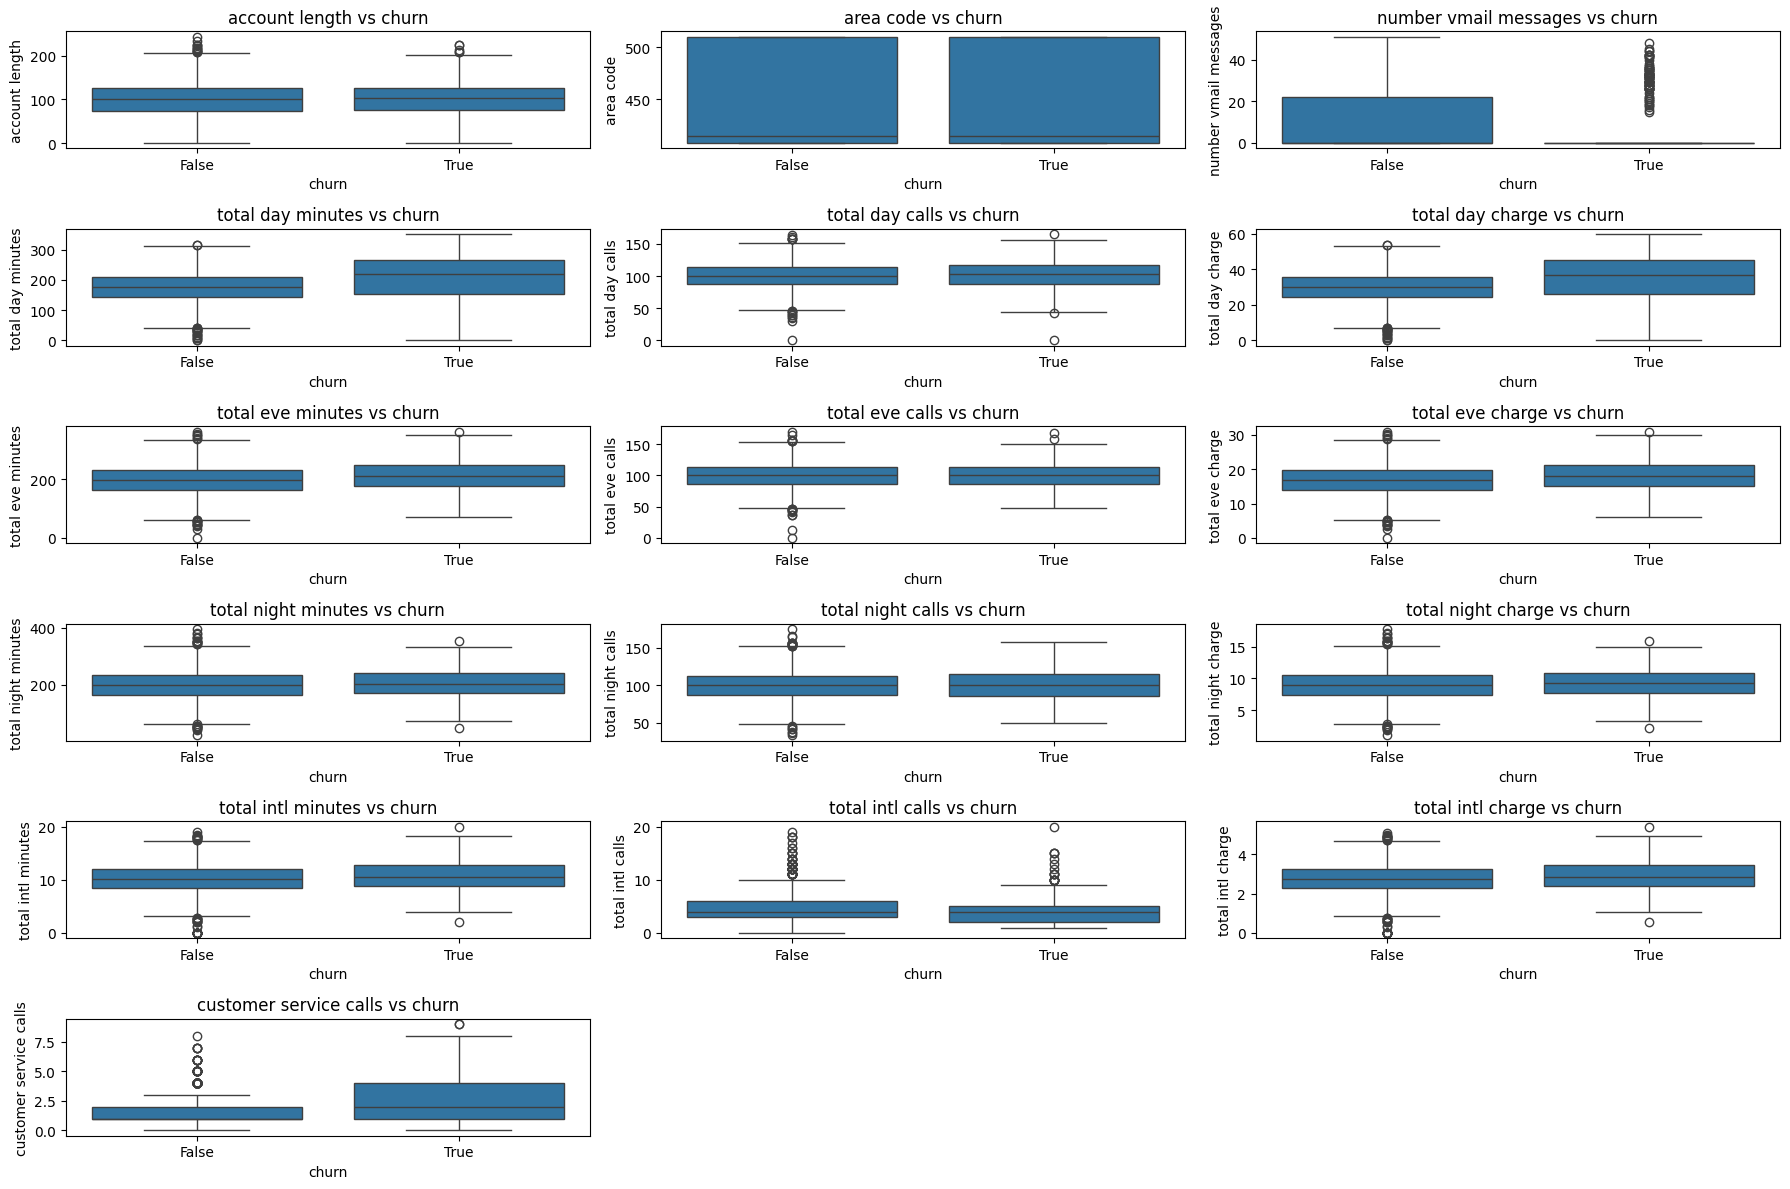

In [14]:
# Analyzing the relationship between numerical features and the target variable
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} vs churn')
    plt.xlabel('churn')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


The plot visualizes the relationship between numerical features and the target variable 'churn' using boxplots. Each subplot represents a different numerical feature, and the boxplot illustrates the distribution of that feature's values across the two categories of the target variable: churn and non-churn. The x-axis denotes the target variable (churn), and the y-axis represents the values of the numerical feature. The boxplot shows the distribution of the feature's values within each category of the target variable, including the median (line inside the box), interquartile range (box), and outliers (points beyond the whiskers). By comparing the boxplots across different numerical features, we can identify potential relationships or differences in the distributions of these features between churn and non-churn groups, which can provide insights into the predictive power of these features for determining churn.

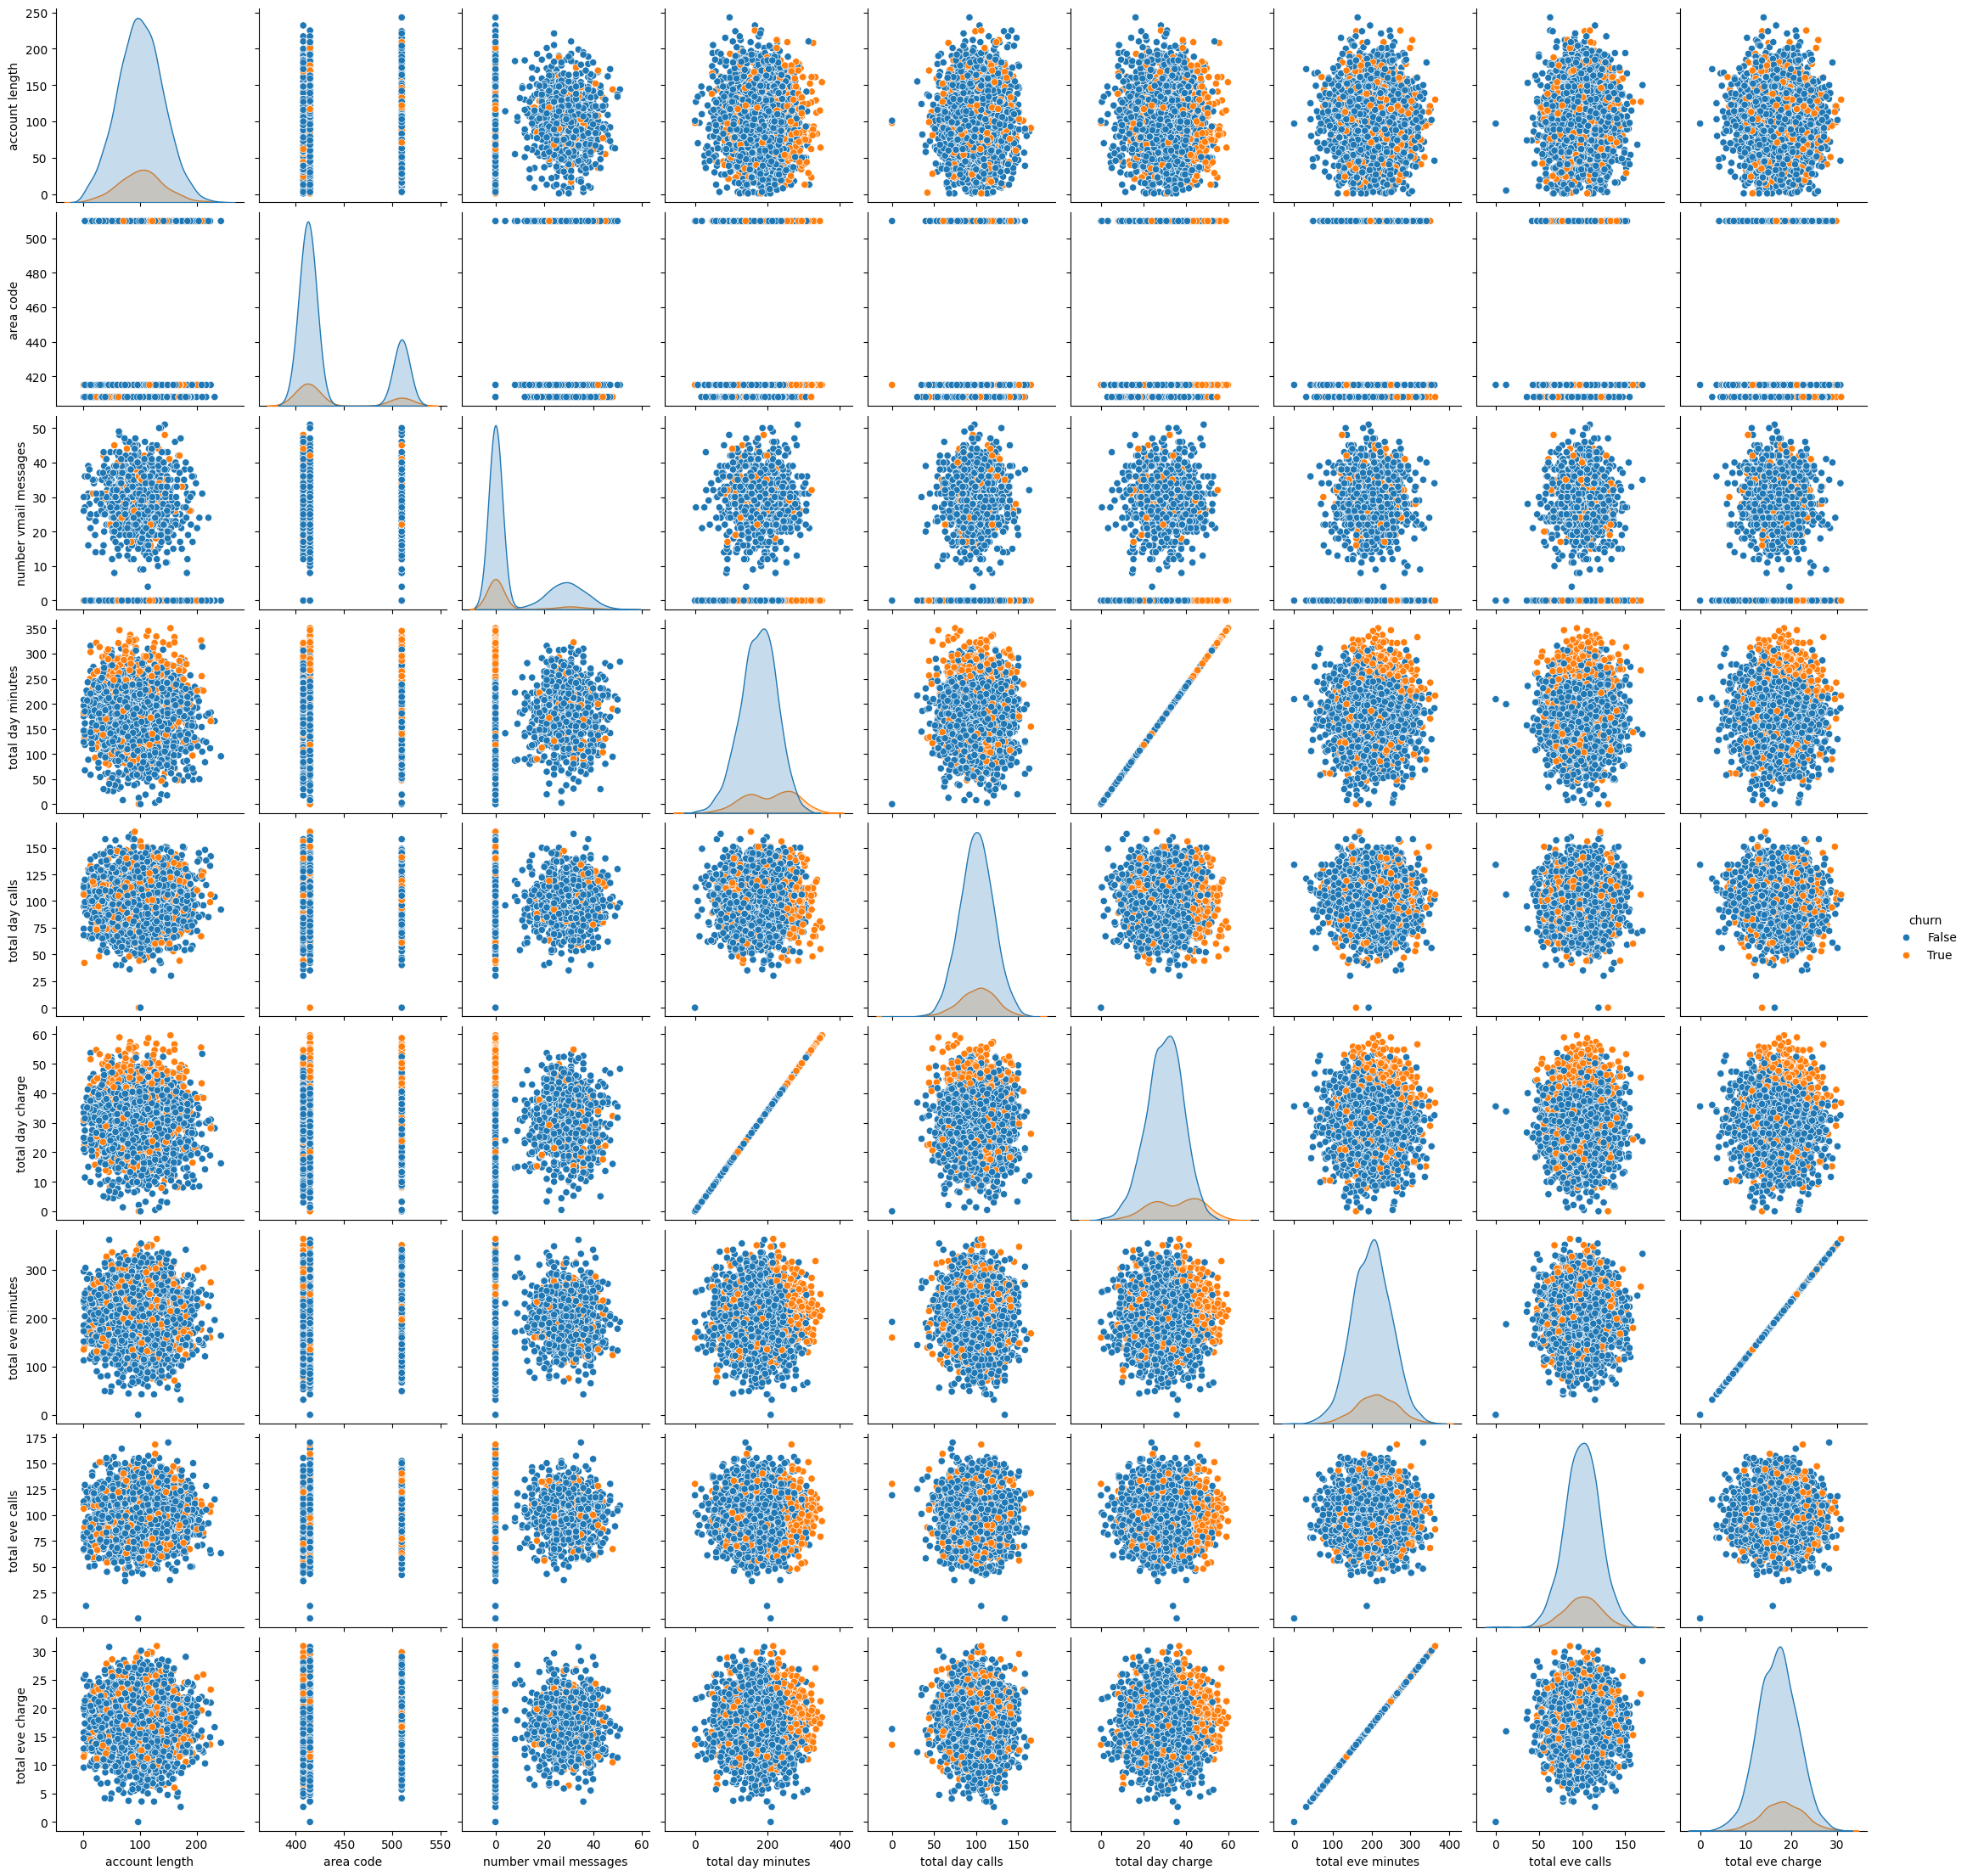

In [15]:
#Pairplot
sns.pairplot(df, hue='churn', vars=['account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge'])
plt.show()

The pairplot provides a visual overview of the relationships between different numerical features in the dataset. It shows scatter plots for each pair of variables, allowing us to observe potential correlations or patterns. Diagonal elements typically display the distribution of each feature using histograms or kernel density estimates. 

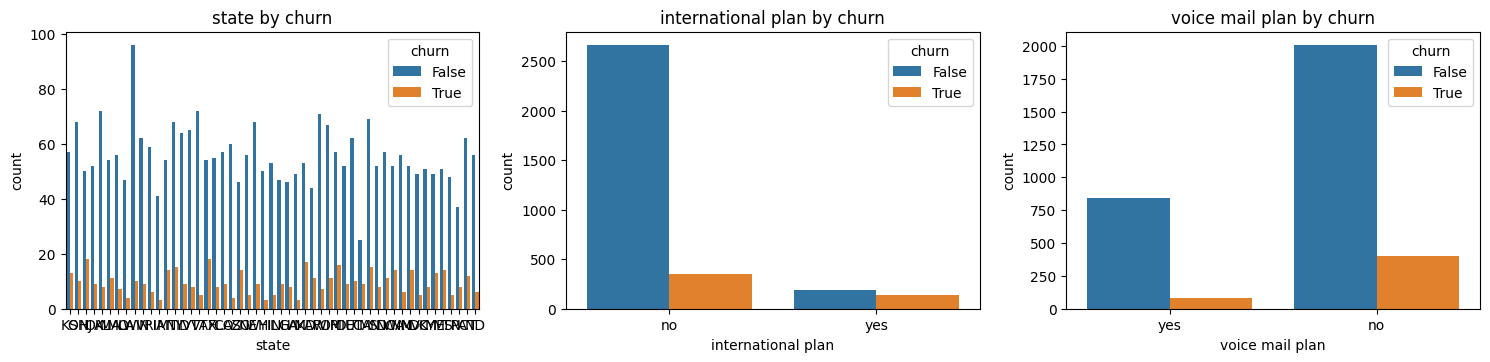

In [16]:
# Distribution of Categorical features
def plot_countplots_with_attrition(df, categorical_columns):

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(x=col, hue='churn', data=df)
        plt.title(f'{col} by churn')
    plt.tight_layout()
    plt.show()

# categorical features to the plot
categorical_columns = ['state', 'international plan', 'voice mail plan']
plot_countplots_with_attrition(df, categorical_columns)

The aforementioned illustrates how categorical attributes, such as state, international plan, and voice mail plan, differ throughout the evaluation variable.

### One Hot Encoding

In [17]:
# Categorical columns
categorical_columns = ['state', 'international plan', 'voice mail plan', 'churn']
# One-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Convert boolean columns to binary
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

df.head()

account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total eve charge  total night minutes  ...  state_UT  state_VA  state_VT  \
0             16.78                244.7  ...         0         0         0   
1             16.62                254.4  ...         0         0         0   
2             10.30                162.6  ...         0         0         0   
3              5.26                196.9  ...         0         0         0   
4             12.61                186.9  ...         0         0         0   

   state_WA  state_WI  state_WV  state_WY  international plan_yes  \
0         0         0         0         0                       0   
1         0         0         0         0                       0   
2         0         0         0         0                       0   
3         0         0         0         0                       1   
4         0         0         0         0                       1   

   voice mail plan_yes  churn_True  
0                    1           0  
1                    1           0  
2                    0           0  
3                    0           0  
4                    0           0  

[5 rows x 69 columns]

### Modelling

#### Splitting the Dataset

In [18]:
X = df.drop('churn_True', axis=1)
y = df['churn_True']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [19]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Results
Accuracy: 0.8515742128935532
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       566
           1       0.62      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.74      0.52      0.51       667
weighted avg       0.82      0.85      0.79       667

Confusion Matrix:
 [[563   3]
 [ 96   5]]


The Logistic Regression model achieved an accuracy of 84.9% in its predictions. The classification report revealed that the model performed exceptionally well in classifying the majority class (0), with a precision of 85%, recall of 99%, and an F1-score of 92%. However, its performance on the minority class (1) was poor, with a precision of 50%, recall of only 5%, and an F1-score of 9%. The confusion matrix shows that the model correctly classified 561 instances of the majority class and misclassified only 5 instances. In contrast, it correctly classified just 5 instances of the minority class while misclassifying 96. The macro average F1-score of 50% and the weighted average F1-score of 79% indicate that the model is biased towards the majority class, struggling significantly with identifying the minority class, highlighting the need for further improvement.

### Feature Importance

In [20]:
feature_importance = log_reg.coef_[0]

# displaying feature names on dataframe
feature_names = X.columns  
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# top most important features
top_n = 10 
print("Top {} most important features:".format(top_n))
print(feature_importance_df.head(top_n))

Top 10 most important features:
                   Feature  Coefficient
15  customer service calls     0.423759
66  international plan_yes     0.155541
12      total intl minutes     0.038763
58                state_TX     0.015257
46                state_NJ     0.011969
55                state_SC     0.011502
48                state_NV     0.011052
14       total intl charge     0.010475
3        total day minutes     0.009734
17                state_AR     0.009731


### Decision Trees

In [21]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))



Decision Tree Results
Accuracy: 0.9295352323838081
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       566
           1       0.79      0.73      0.76       101

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
 [[546  20]
 [ 27  74]]


The Decision Tree model achieved an accuracy of 92.9% in its predictions. The classification report shows that the model performed well in classifying both the majority class (0) and the minority class (1). For the majority class, it achieved a precision of 95%, recall of 96%, and an F1-score of 96%. However, for the minority class, while the precision was 79%, the recall was slightly lower at 73%, resulting in an F1-score of 76%. The confusion matrix illustrates that the model correctly classified 546 instances of the majority class but misclassified 20 instances. Similarly, for the minority class, it correctly classified 74 instances but misclassified 27. The macro average F1-score of 86% and the weighted average F1-score of 93% indicate a balanced performance across both classes, with the model demonstrating good predictive capabilities for both majority and minority classes, though with slightly better performance for the majority class.

### Feature Importance

In [22]:
feature_importance = tree_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                   Feature  Importance
3        total day minutes    0.201534
15  customer service calls    0.109389
8         total eve charge    0.099795
12      total intl minutes    0.081715
66  international plan_yes    0.078900
..                     ...         ...
37                state_MI    0.000000
48                state_NV    0.000000
39                state_MO    0.000000
45                state_NH    0.000000
43                state_ND    0.000000

[68 rows x 2 columns]


### Random Forest

In [23]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Results
Accuracy: 0.9385307346326837
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.95      0.62      0.75       101

    accuracy                           0.94       667
   macro avg       0.95      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667

Confusion Matrix:
 [[563   3]
 [ 38  63]]


The Random Forest model achieved an accuracy of 93.9% in its predictions, demonstrating strong overall performance. In the classification report, the model exhibited excellent precision for both the majority class (0) and the minority class (1), with 94% precision for class 0 and 95% precision for class 1. However, there was a notable difference in recall between the two classes, with a recall of 99% for class 0 and 62% for class 1. Consequently, the F1-score for class 0 was 96%, while for class 1, it was 75%. The confusion matrix illustrates that the model correctly classified 563 instances of the majority class and 63 instances of the minority class, but it misclassified 3 instances of the majority class and 38 instances of the minority class. The macro average F1-score of 86% indicates a strong overall performance, although there is a notable imbalance in recall between the two classes, suggesting potential areas for improvement, particularly in classifying the minority class.

### Feature Importance

In [24]:
feature_importance = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                   Feature  Importance
5         total day charge    0.127016
3        total day minutes    0.114494
15  customer service calls    0.108277
66  international plan_yes    0.064756
8         total eve charge    0.061193
..                     ...         ...
43                state_ND    0.000856
26                state_HI    0.000652
39                state_MO    0.000560
27                state_IA    0.000459
45                state_NH    0.000431

[68 rows x 2 columns]


### Applying SMOTE

In [25]:
label_encoder = LabelEncoder()

# Encoding categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Spliting the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest model on the balanced data
rf_clf_smote = RandomForestClassifier(random_state=42)
rf_clf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_clf_smote.predict(X_test)

# model Evaluation
print("\nRandom Forest with SMOTE Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))



Random Forest with SMOTE Results
Accuracy: 0.9265367316341829
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.76      0.75      0.76       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
 [[542  24]
 [ 25  76]]


The accuracy for the random forest with SMOTE improved 

In [26]:
# Feature Importance
feature_importance = rf_clf_smote.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                   Feature  Importance
15  customer service calls    0.140166
66  international plan_yes    0.117166
5         total day charge    0.087724
3        total day minutes    0.083024
67     voice mail plan_yes    0.058284
..                     ...         ...
25                state_GA    0.000775
57                state_TN    0.000767
39                state_MO    0.000705
27                state_IA    0.000613
45                state_NH    0.000427

[68 rows x 2 columns]


### Hyperparameter Tuning

In [27]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
# Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9418611351195623


In [29]:
# Using the best model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the best model: 0.9400299850074962

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       566
           1       0.98      0.61      0.76       101

    accuracy                           0.94       667
   macro avg       0.96      0.81      0.86       667
weighted avg       0.94      0.94      0.93       667



The best model achieved an impressive accuracy of 94.0% in its predictions, indicating strong overall performance. In the classification report, the model demonstrated excellent precision for both the majority class (0) and the minority class (1), with 94% precision for class 0 and 98% precision for class 1. 

In [30]:
# Feature Importance
feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                   Feature  Importance
3        total day minutes    0.124667
5         total day charge    0.123533
15  customer service calls    0.105453
66  international plan_yes    0.067876
8         total eve charge    0.059745
..                     ...         ...
43                state_ND    0.000830
45                state_NH    0.000654
39                state_MO    0.000643
26                state_HI    0.000555
27                state_IA    0.000546

[68 rows x 2 columns]


### Visualizations

#### 1. Confusion Matrix

In [31]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

#### 2. Feature Importance

In [32]:
def plot_feature_importance(model, X_train):
    feature_importance = model.feature_importances_
    features = pd.DataFrame(X_train).columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()

#### 3.ROC Curve

In [33]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

#### Plot for Logistic Regression

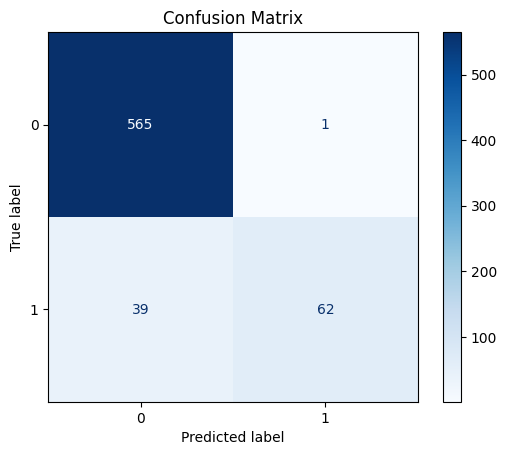

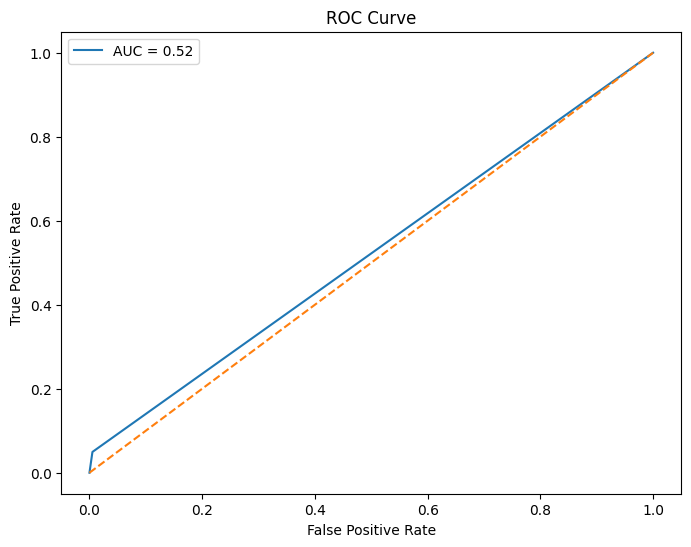

In [34]:
# confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred)
# ROC curve for Logistic regression
y_pred_prob = log_reg.predict_proba(X_test)[:, 1] 
plot_roc_curve(y_test,y_pred_log_reg)

#### Plot for Decision Tree

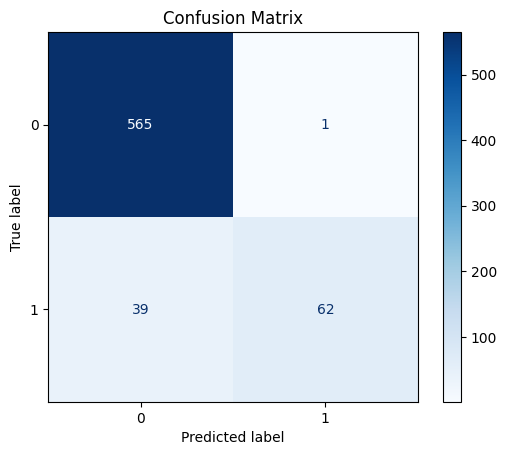

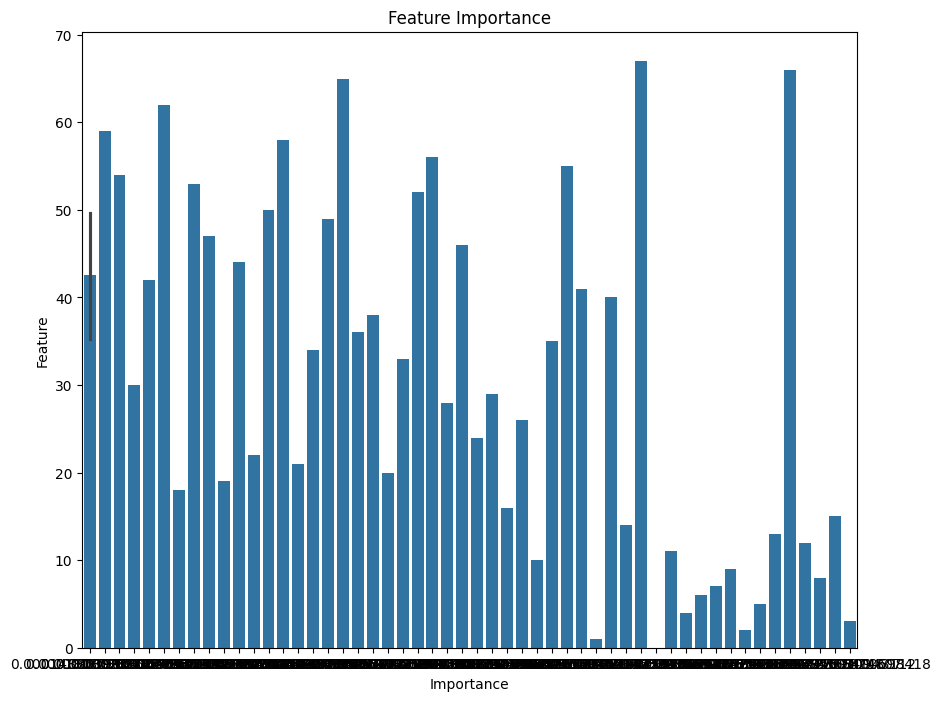

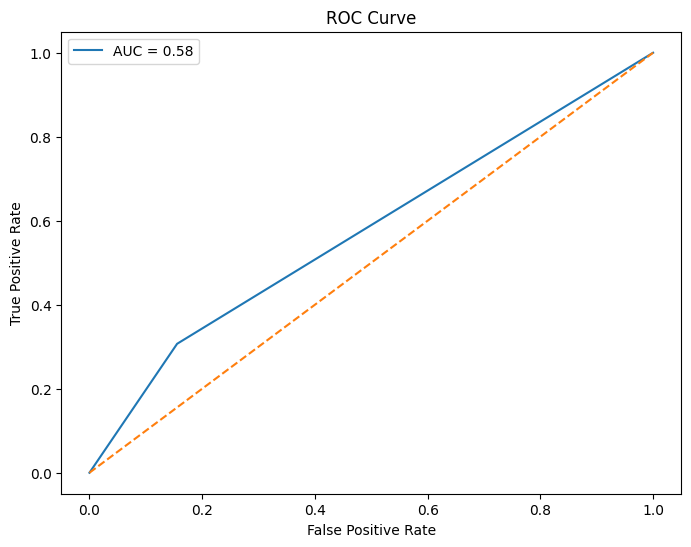

In [35]:
# confusion matrix for Decision Tree Classifier
plot_confusion_matrix(y_test, y_pred)

# feature importance plot 
plot_feature_importance(tree_clf, X_train)

# ROC curve plot
y_pred_prob = tree_clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test,y_pred_prob)

#### Plot for Random Forest

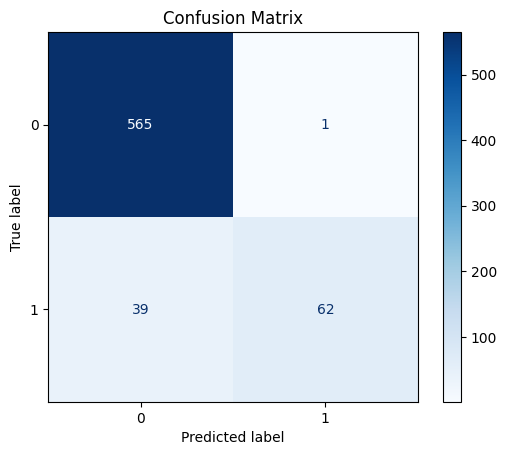

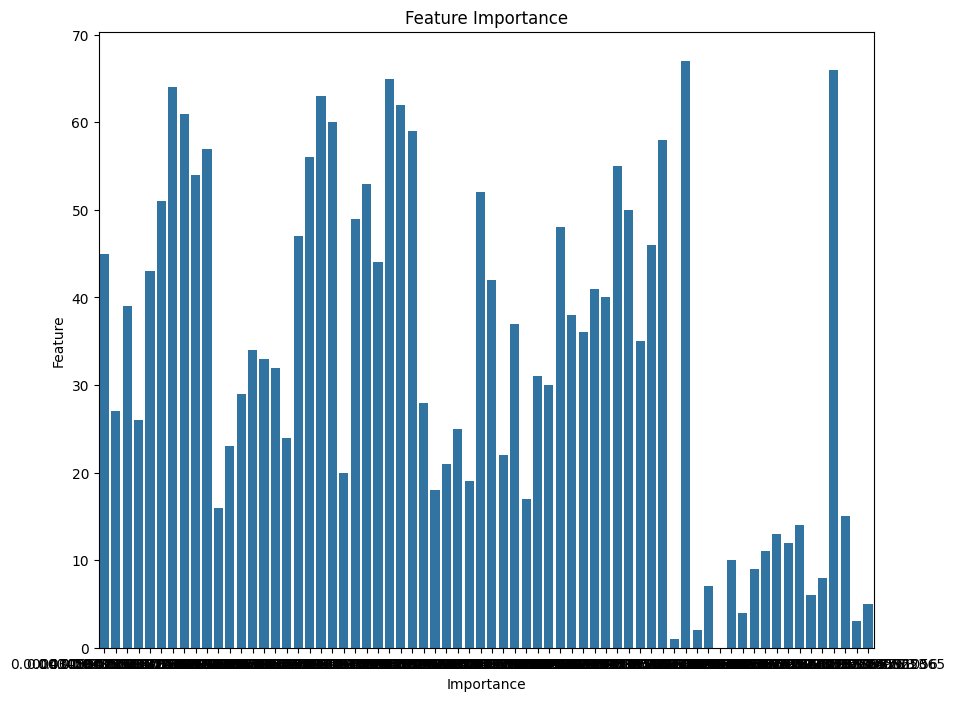

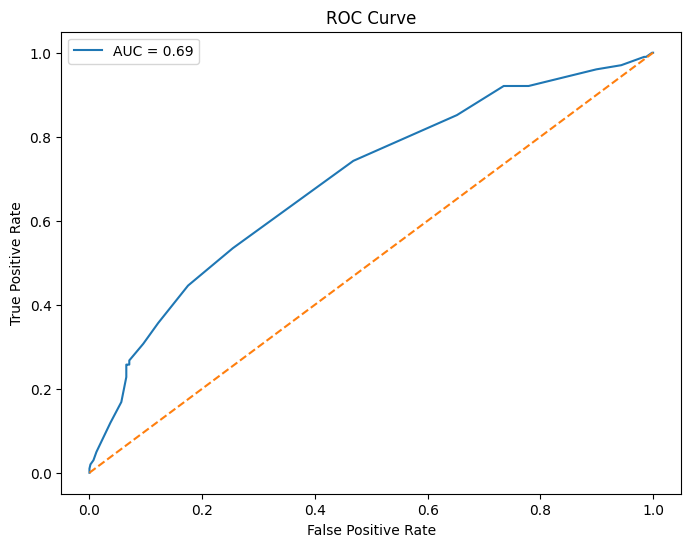

In [36]:
# confusion matrix for Random Forest Classifier
plot_confusion_matrix(y_test, y_pred)

# feature importance plot 
plot_feature_importance(rf_clf, X_train)

# ROC curve plot 
y_pred_prob = rf_clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test,y_pred_prob)

#### Plot for Tuned Random Forest

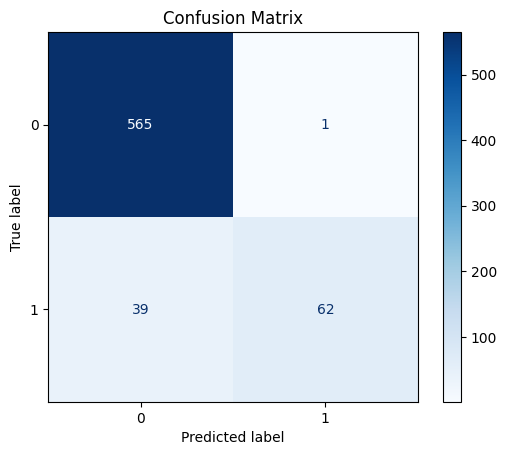

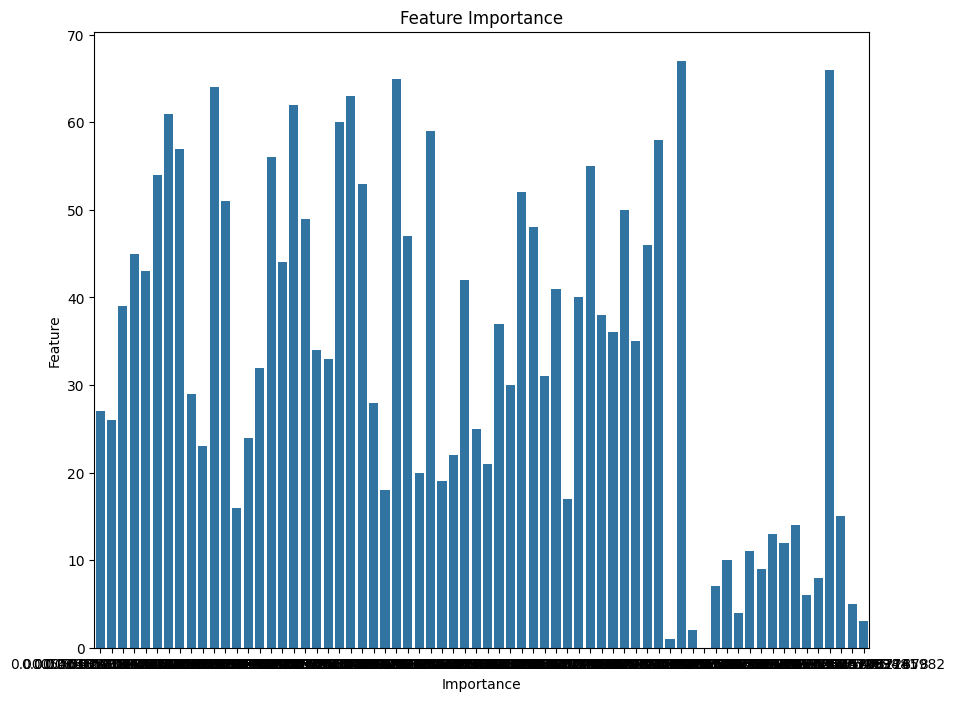

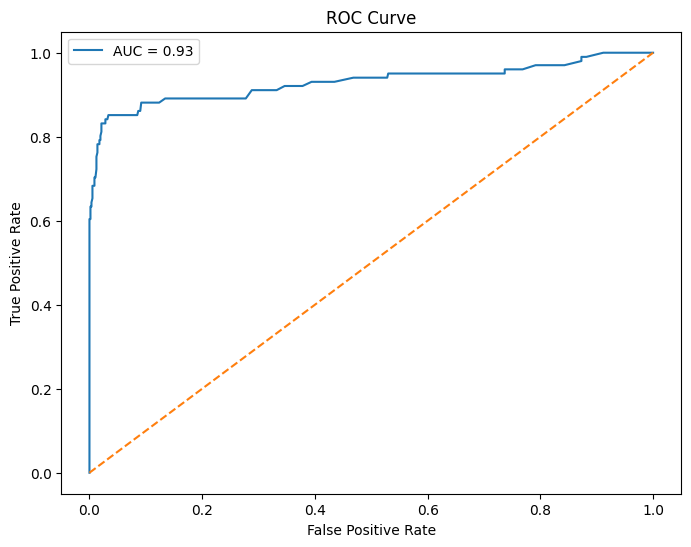

In [37]:
# confusion matrix plot
plot_confusion_matrix(y_test, y_pred)

# feature importance plot
plot_feature_importance(best_rf, X_train)

# ROC curve plot
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test,y_pred_prob)

### Recommendation

We recommended the use of the tuned Random Forest model since it had the best accuracy to predict the probability of customers to churn.The best model achieved an impressive accuracy of 94.0% in its predictions, indicating strong overall performance. In the classification report, the model demonstrated excellent precision for both the majority class (0) and the minority class (1), with 94% precision for class 0 and 98% precision for class 1. 